
-- Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases,
    Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

    

-- Output: Number of predicted wins (W)



-- General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features,
    a linear regression approach is neccessary. 

In [1]:
#Import Libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data

baseball_dataset=pd.read_csv("baseball.csv")

Identification of variables and data types

In [3]:
#info of data

baseball_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
#Check the top 5 columns of dataset

baseball_dataset.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


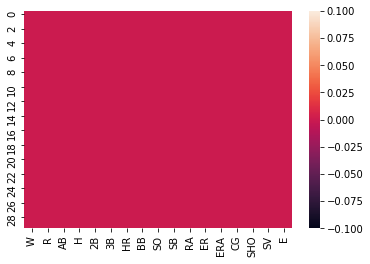

In [5]:
# Check null values 
sns.heatmap(baseball_dataset.isnull())

Observation : No Null values 

In [6]:
baseball_dataset.shape

(30, 17)

In [7]:
baseball_dataset.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Univariate/Bivariate  Analysis (Graphical/Non-graphical)

Text(0.5, 1.0, 'Distribution of wins')

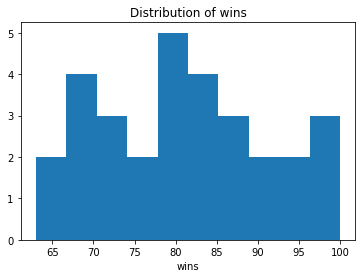

In [8]:
plt.hist(baseball_dataset['W'])
plt.xlabel('wins')
plt.title('Distribution of wins')

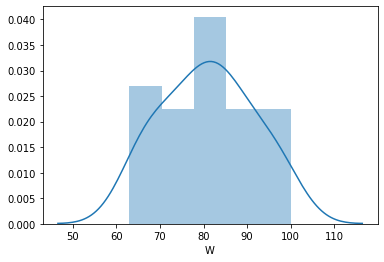

In [9]:
sns.distplot(baseball_dataset['W'])

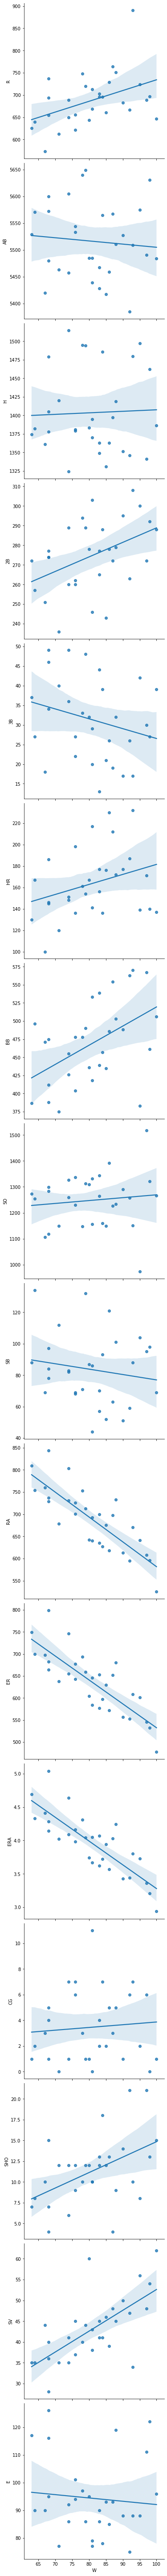

In [10]:
##Pairplots
sns.pairplot(data=baseball_dataset, kind='reg', size = 5,
                 x_vars=['W'],
                  y_vars=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'])

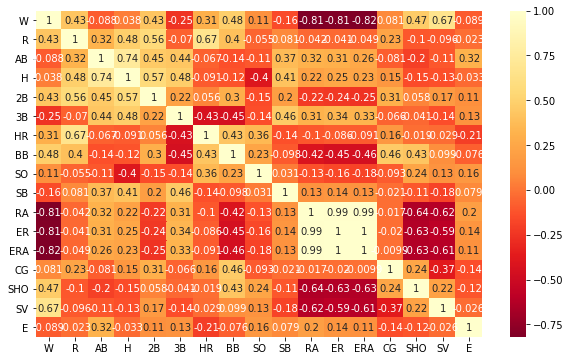

In [11]:
#Correlation 
cor=baseball_dataset.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='YlOrRd_r',annot=True)

In [7]:
#remove outliers
from scipy.stats import zscore
z=abs(zscore(baseball_dataset))
print(baseball_dataset.shape)
baseball_dataset = baseball_dataset.loc[(z < 3).all(axis=1)]
print(baseball_dataset.shape)

(29, 17)
(29, 17)


outliers Present hence removed

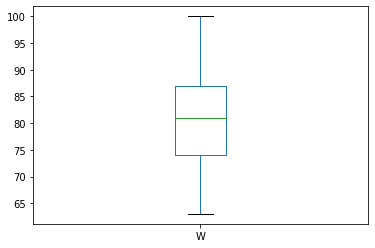

In [13]:
#blot box
baseball_dataset['W'].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F41E2B448>,
      dtype=object)

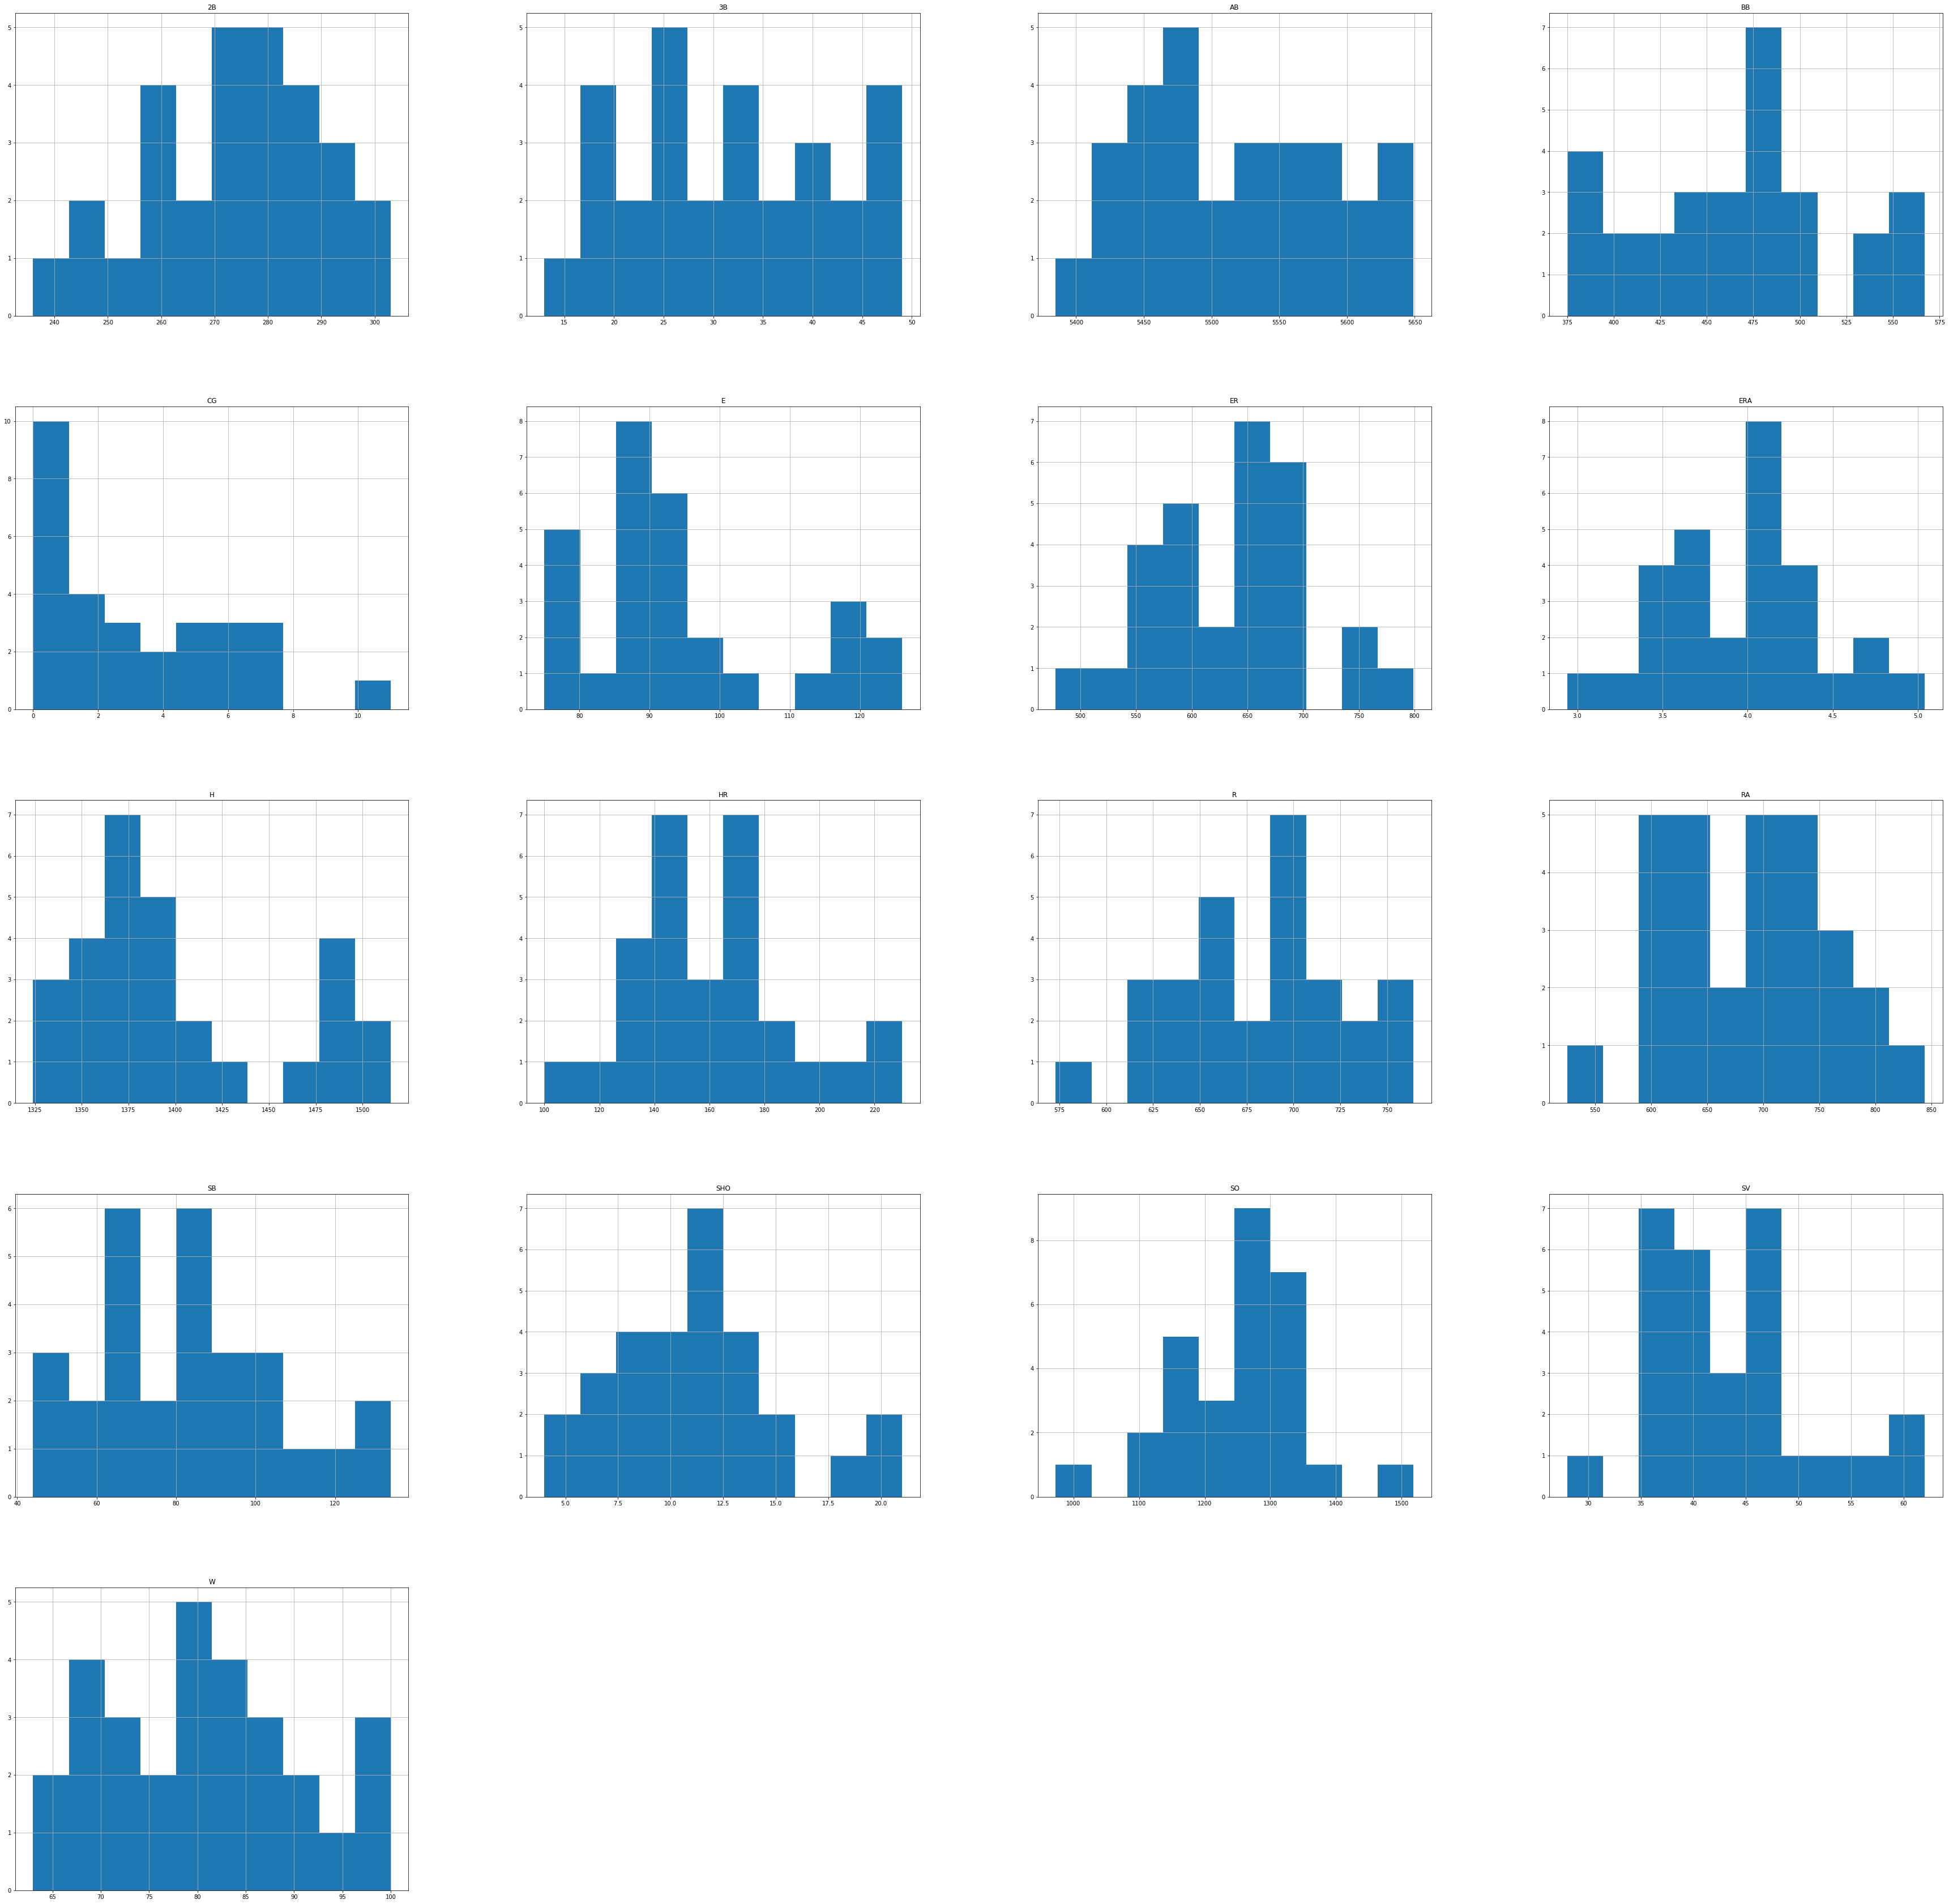

In [14]:
baseball_dataset.hist(figsize=(61,61))

In [15]:
#Check skewness

baseball_dataset.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

No skewness 

Prediction : Linear Regression 

In [16]:
X = baseball_dataset.drop(["W"], axis=1)
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [17]:
Y = baseball_dataset["W"]
Y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [18]:
X.shape

(29, 16)

In [19]:
Y.shape

(29,)

In [20]:
#Split data into train and test data - Linear Model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,130):
        x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2_score corresponding to random state: " ,r_state, "is", r2_scr)
        if r2_scr >max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," ",max_r_score)
#the below output shows that we are getting acceptable levl of r2 score in most of the cases and max value is also shown
    return final_r_state

In [21]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,X,Y)

max r2 score corresponding to 106   0.9424570384732842


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lm=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=106)
lm.fit(x_train,y_train)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23, 16)
(23,)
(6, 16)
(6,)


In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.coef_
lm.intercept_
pre=lm.predict(x_test)
print('Mean Absolute error:  = ',mean_absolute_error(y_test,pred))
print('Mean Squared error = ',mean_squared_error(y_test,pred))
print('Root Mean Squared error = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',ri.score(x_train,y_train))

MAE =  2.5593729221327712
MSE =  9.62885556213711
Root Mean Squared error =  3.103039729384255
R2_score =  0.9424570384732842
Training_score =  0.9382192853872902


Regularisation :: L1 and L2 Regularization 

In [25]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(x_train,y_train)
pred=ri.predict(x_test)
print('Mean Absolute error:  = ',mean_absolute_error(y_test,pred))
print('Mean Squared error = ',mean_squared_error(y_test,pred))
print('Root Mean Squared error = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',ri.score(x_train,y_train))

Mean Absolute error:  =  3.0559931979185984
Mean Squared error =  11.875648617090244
Root Mean Squared error =  3.4461062979963697
R2_score =  0.9290299883440822
Training_score =  0.9300977591797187


In [26]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred=en.predict(x_test)
print('Mean Absolute error:  = ',mean_absolute_error(y_test,pred))
print('Mean Squared error = ',mean_squared_error(y_test,pred))
print('Root Mean Squared error = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',en.score(x_train,y_train))

Mean Absolute error:  =  3.8148368926959058
Mean Squared error =  20.039644014879883
Root Mean Squared error =  4.476566096337669
R2_score =  0.8802411712258175
Training_score =  0.9241091207584022


In [28]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)
print('Mean Absolute error:  = ',mean_absolute_error(y_test,pred))
print('Mean Squared error = ',mean_squared_error(y_test,pred))
print('Root Mean Squared error = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',en.score(x_train,y_train))

Mean Absolute error:  =  4.049312669884522
Mean Squared error =  23.55117202229518
Root Mean Squared error =  4.8529549783915344
R2_score =  0.8592559440898695
Training_score =  0.9241091207584022


In [30]:
#predict the value 
pred=lm.predict(x_test)
print("Predicted the result price",pred)
print("\n\n Actual Score: \n",y_test)

Predicted the result price [78.48841444 64.91259101 72.19450837 64.59941447 90.04069604 97.77398376]


 Actual Score: 
 9     78
29    68
18    68
23    67
0     95
16    98
Name: W, dtype: int64


Regressor/Esemble techniques

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [39]:
DTR=DecisionTreeRegressor(random_state=5)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=5)
RFR=RandomForestRegressor(random_state=5)
GBR=GradientBoostingRegressor(random_state=5)

In [40]:
models=[]
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    MSE.append(mse)
    score= cross_val_score(model,X,Y,cv=10,scoring='r2').mean()
    cvs.append(score)
    print('\n')

In [42]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,DecisionTreeRegressor,0.606574,65.833333,-18.491899
1,KNeighborsRegressor,0.354183,108.066667,-6.461024
2,AdaBoostRegressor,0.677704,53.930933,-8.714550
3,RandomForestRegressor,0.675082,54.369533,-7.640934
4,GradientBoostingRegressor,0.681702,53.261934,-12.408621


Best Model is Linear Regresion  as highest score is 94% 

MAE =  2.5593729221327712
MSE =  9.62885556213711
Root Mean Squared error =  3.103039729384255
R2_score =  0.9424570384732842
Training_score =  0.9382192853872902

In [38]:
#Saving the model

from sklearn.externals import joblib
joblib.dump(lm,'baseball_lregfile.obj')

['baseball_lregfile.obj']